<a href="https://colab.research.google.com/github/HarshitSahni18/TASKS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load datasets from Google Drive
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

# Display first few rows of each dataset to verify loading
customers.head(), products.head(), transactions.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

## Customer

In [5]:
customers.head

<bound method NDFrame.head of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

Check Data Structure

In [15]:
# Check the structure of the datasets
print(customers.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


Check for Missing Values

In [16]:
# Check missing values in each dataset
print(customers.isnull().sum())



CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Summary Statistics

In [17]:
# Basic statistical summary of numerical columns
print(customers.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


Visualize Data Distributions

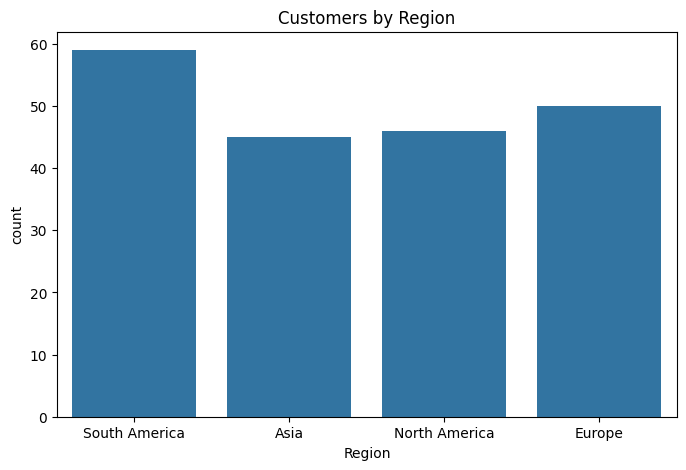

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer distribution by region
plt.figure(figsize=(8,5))
sns.countplot(x='Region', data=customers)
plt.title('Customers by Region')
plt.show()


Summary Statistics (describe())

In [19]:
print("\ncustomers Summary Statistics:")
print(customers.describe())





customers Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


Customer Distribution by Region

<ipython-input-21-1e02c3a0cbaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette="Set2")


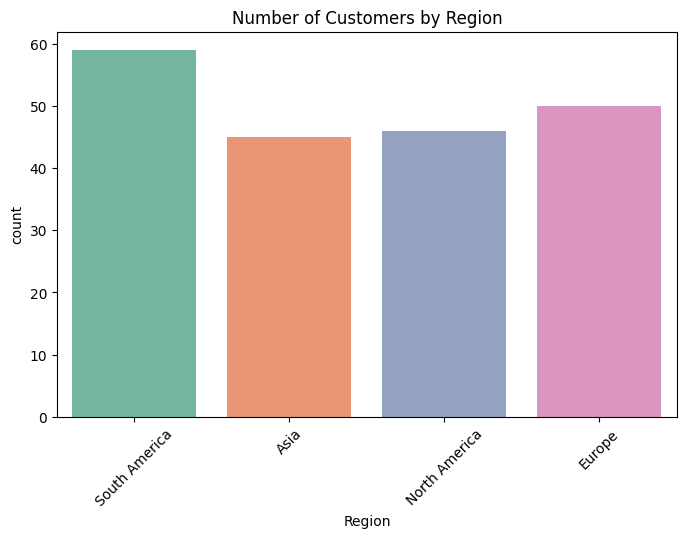

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers, palette="Set2")
plt.title("Number of Customers by Region")
plt.xticks(rotation=45)
plt.show()


Sign-Up Date Analysis

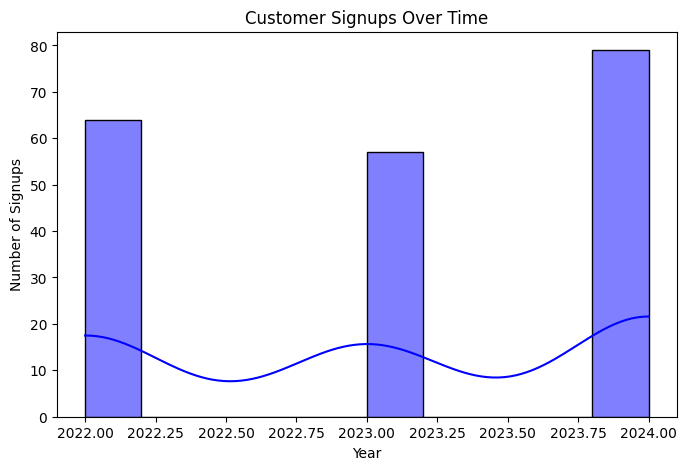

In [22]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['Year'] = customers['SignupDate'].dt.year

plt.figure(figsize=(8, 5))
sns.histplot(customers['Year'], bins=10, kde=True, color='blue')
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


In [14]:
percentile_20 = transactions['TotalValue'].quantile(0.20)
percentile_25 = transactions['TotalValue'].quantile(0.25)

print("20th Percentile of TotalValue:", percentile_20)
print("25th Percentile of TotalValue:", percentile_25)


20th Percentile of TotalValue: 242.64
25th Percentile of TotalValue: 295.29499999999996


## Products

Checking for Missing Values

In [23]:
print("\nMissing Values in Products.csv:\n", products.isnull().sum())


Missing Values in Products.csv:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Summary Statistics (describe())

In [24]:
print("\nProducts Dataset Summary:")
print(products.describe())


Products Dataset Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


**Outlier Detection & Removal**

Products Dataset (Price Outliers)

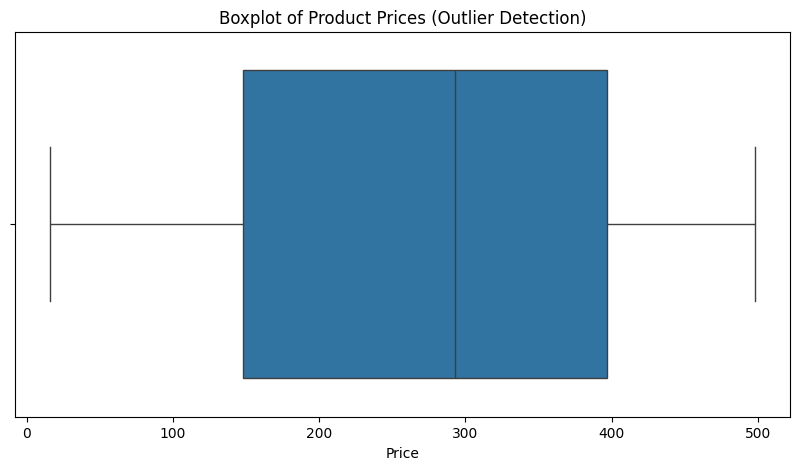

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=products['Price'])
plt.title("Boxplot of Product Prices (Outlier Detection)")
plt.show()


Remove Outliers Using IQR

In [26]:
Q1 = products['Price'].quantile(0.25)
Q3 = products['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

products_cleaned = products[(products['Price'] >= lower_bound) & (products['Price'] <= upper_bound)]

print("Original Products Dataset Shape:", products.shape)
print("After Removing Outliers:", products_cleaned.shape)


Original Products Dataset Shape: (100, 4)
After Removing Outliers: (100, 4)


Find 20th & 25th Percentiles

In [27]:
print("20th & 25th Percentile of Product Prices:")
print("20th Percentile:", products['Price'].quantile(0.20))
print("25th Percentile:", products['Price'].quantile(0.25))

20th & 25th Percentile of Product Prices:
20th Percentile: 127.156
25th Percentile: 147.76749999999998


Data Visualizations

<ipython-input-28-92adb633ecb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index, palette="coolwarm")


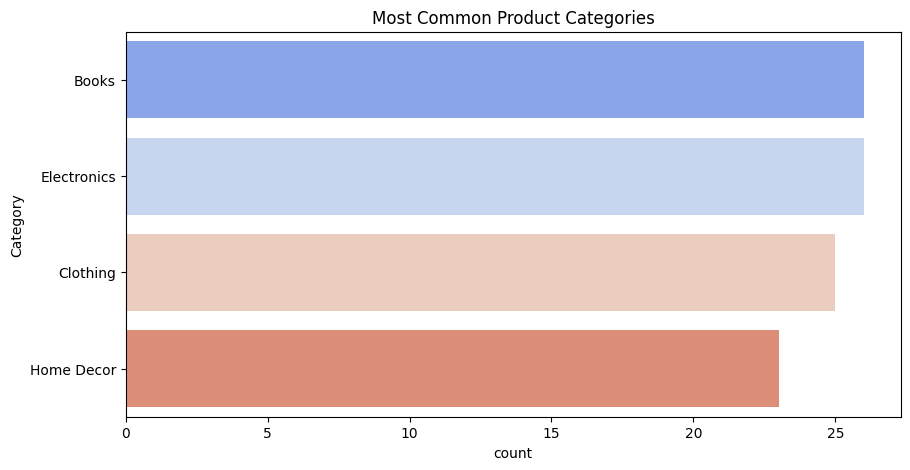

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index, palette="coolwarm")
plt.title("Most Common Product Categories")
plt.show()


Top 10 Best-Selling Products

<ipython-input-29-71c96deebdf1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductName', data=top_products.head(10), palette='viridis')


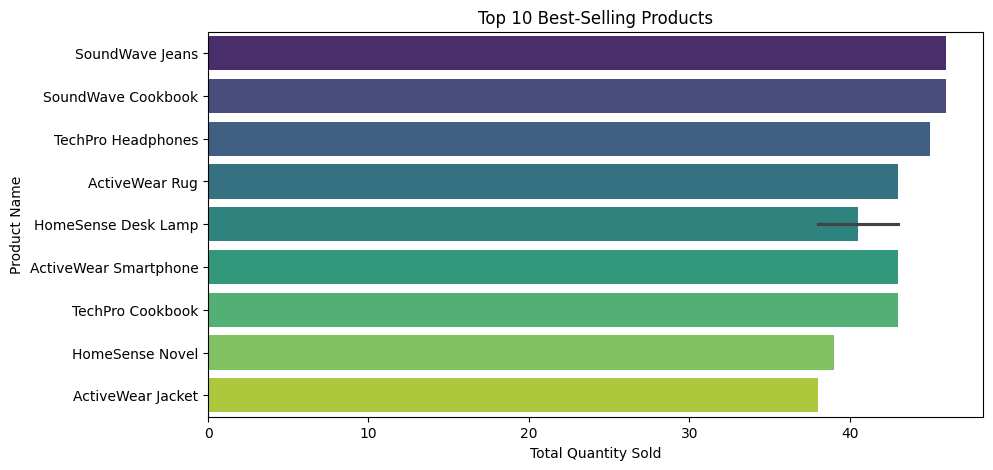

In [29]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False)

# Merge with product names
top_products = top_products.merge(products, on='ProductID', how='left')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Quantity', y='ProductName', data=top_products.head(10), palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()


## Transactions

Checking for Missing Values

In [30]:
print("\nMissing Values in Transactions.csv:\n", transactions.isnull().sum())


Missing Values in Transactions.csv:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Summary Statistics (describe())

In [31]:
print("\nTransactions Dataset Summary:")
print(transactions.describe())


Transactions Dataset Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


**Outlier Detection & Removal**

Transactions Dataset (Total Transaction Value Outliers)

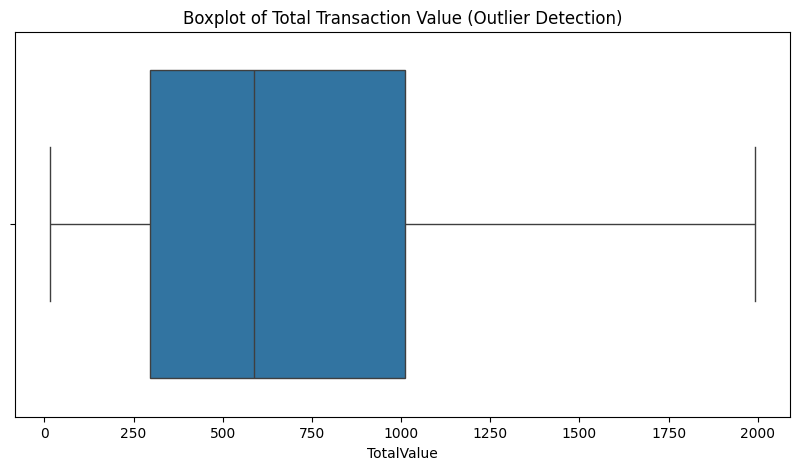

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=transactions['TotalValue'])
plt.title("Boxplot of Total Transaction Value (Outlier Detection)")
plt.show()


Remove Outliers Using IQR

In [33]:
Q1 = transactions['TotalValue'].quantile(0.25)
Q3 = transactions['TotalValue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

transactions_cleaned = transactions[(transactions['TotalValue'] >= lower_bound) & (transactions['TotalValue'] <= upper_bound)]

print("Original Transactions Dataset Shape:", transactions.shape)
print("After Removing Outliers:", transactions_cleaned.shape)


Original Transactions Dataset Shape: (1000, 7)
After Removing Outliers: (1000, 7)


Find 20th & 25th Percentiles

In [34]:

print("\n20th & 25th Percentile of Transaction Total Value:")
print("20th Percentile:", transactions['TotalValue'].quantile(0.20))
print("25th Percentile:", transactions['TotalValue'].quantile(0.25))


20th & 25th Percentile of Transaction Total Value:
20th Percentile: 242.64
25th Percentile: 295.29499999999996


Data Visualizations

<ipython-input-35-c484da8fd768>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=transactions['Month'].astype(str), y=transactions['TotalValue'], estimator='sum', ci=None, color='red')


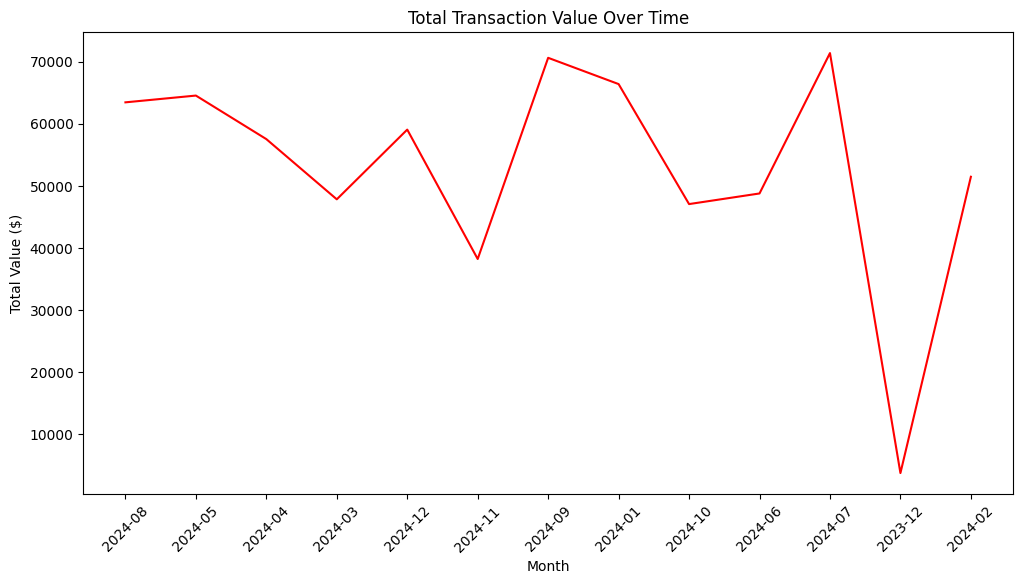

In [35]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions['Month'].astype(str), y=transactions['TotalValue'], estimator='sum', ci=None, color='red')
plt.xticks(rotation=45)
plt.title("Total Transaction Value Over Time")
plt.xlabel("Month")
plt.ylabel("Total Value ($)")
plt.show()
